In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [22]:
# My sample data
data = {
    'Size': [1500, 1800, 2400, 3000, 3500, 1600, 2000, 2200, 2800, 3200],
    'Location': ['A', 'B', 'A', 'B', 'C', 'A', 'C', 'B', 'C', 'A'],
    'Price': [300000, 400000, 500000, 600000, 700000, 320000, 450000, 470000, 650000, 720000]
}
df = pd.DataFrame(data)

# One-hot encode stolen this from Dr. Ofori
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Preparing the data for the regression model
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Adjusting the test size to make sure I have more test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2650572503.4034214
R-squared: 0.830363359782181


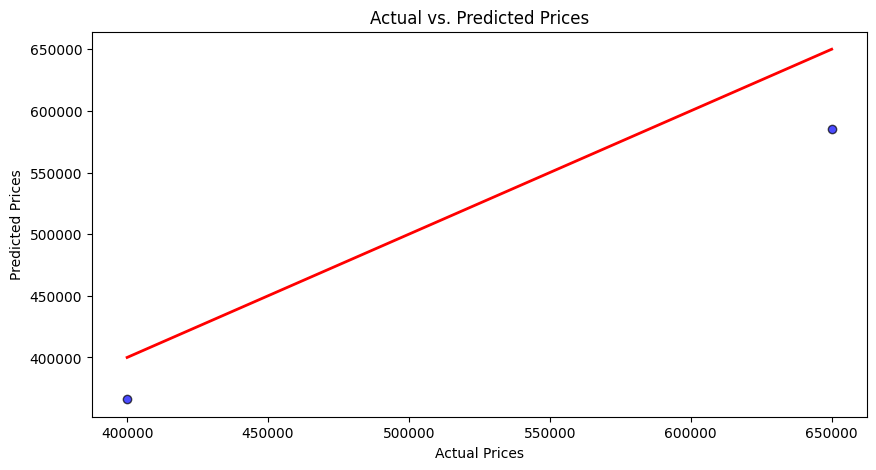

In [23]:
# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

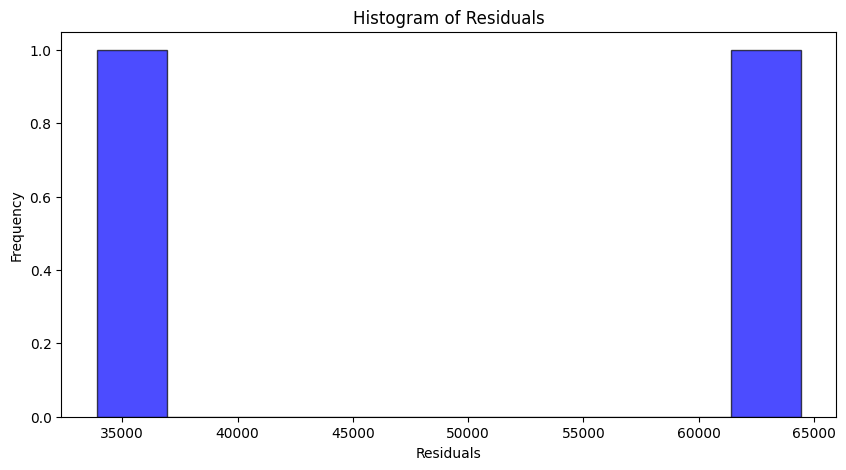

In [24]:
# Histogram of residuals (errors)
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=10, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()